In [1]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [6]:
shop = pd.read_excel("market basket shopping.xlsx")
shop.head(5)

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [48]:
shop.isnull().sum()

BillNo             0
Itemname        1455
Quantity           0
Date               0
Price              0
CustomerID    134041
Country            0
dtype: int64

In [ ]:
shop['Country'].value_counts()

In [28]:
France = shop[shop['Country'] == 'France']
France.head(5)

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
26,536370,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583.0,France
27,536370,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583.0,France
28,536370,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,12583.0,France
29,536370,PANDA AND BUNNIES STICKER SHEET,12,2010-12-01 08:45:00,0.85,12583.0,France
30,536370,STARS GIFT TAPE,24,2010-12-01 08:45:00,0.65,12583.0,France


In [49]:
France.isnull().sum()

BillNo         0
Itemname       0
Quantity       0
Date           0
Price          0
CustomerID    66
Country        0
date           0
dtype: int64

In [29]:
France.duplicated().sum()

15

In [30]:
France = France.drop_duplicates()

In [31]:
France['Itemname'] = France['Itemname'].str.strip()

In [32]:
France['Date'] = France['Date'].astype(str)

In [33]:
France['date'] = France['Date'].str.split(' ').str[0]

In [35]:
France.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country,date
26,536370,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583.0,France,2010-12-01
27,536370,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583.0,France,2010-12-01
28,536370,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,12583.0,France,2010-12-01
29,536370,PANDA AND BUNNIES STICKER SHEET,12,2010-12-01 08:45:00,0.85,12583.0,France,2010-12-01
30,536370,STARS GIFT TAPE,24,2010-12-01 08:45:00,0.65,12583.0,France,2010-12-01


In [36]:
transaction = France.groupby(['BillNo', 'date'])['Itemname'].apply(list)
transaction.head()

BillNo  date      
536370  2010-12-01    [ALARM CLOCK BAKELIKE PINK, ALARM CLOCK BAKELI...
536852  2010-12-03    [PICTURE DOMINOES, MINI JIGSAW SPACEBOY, MINI ...
536974  2010-12-03    [EDWARDIAN PARASOL BLACK, EDWARDIAN PARASOL PI...
537065  2010-12-05    [HOT WATER BOTTLE BABUSHKA, BREAD BIN DINER ST...
537463  2010-12-07    [JAM MAKING SET PRINTED, SET/4 SKULL BADGES, R...
Name: Itemname, dtype: object

In [38]:
transaction_encoder = TransactionEncoder()
trans_array = transaction_encoder.fit(transaction).transform(transaction)
France_MB = pd.DataFrame(trans_array, columns = transaction_encoder.columns_)
France_MB

,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
388,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
389,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
390,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [41]:
frequent_itemset = apriori(France_MB, min_support = 0.01, use_colnames = True)


In [43]:
rules = association_rules(frequent_itemset, metric = 'lift')


In [45]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(CARD DOLLY GIRL),(10 COLOUR SPACEBOY PEN),0.030612,0.030612,0.010204,0.333333,10.888889,0.009267,1.454082,0.936842
1,(10 COLOUR SPACEBOY PEN),(CARD DOLLY GIRL),0.030612,0.030612,0.010204,0.333333,10.888889,0.009267,1.454082,0.936842
2,(10 COLOUR SPACEBOY PEN),(CHARLOTTE BAG SUKI DESIGN),0.030612,0.043367,0.010204,0.333333,7.686275,0.008877,1.434949,0.897368
3,(CHARLOTTE BAG SUKI DESIGN),(10 COLOUR SPACEBOY PEN),0.043367,0.030612,0.010204,0.235294,7.686275,0.008877,1.267661,0.909333
4,(ICE CREAM SUNDAE LIP GLOSS),(10 COLOUR SPACEBOY PEN),0.045918,0.030612,0.010204,0.222222,7.259259,0.008798,1.246356,0.903743


In [46]:
rules.head().sort_values(by = 'lift', ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(CARD DOLLY GIRL),(10 COLOUR SPACEBOY PEN),0.030612,0.030612,0.010204,0.333333,10.888889,0.009267,1.454082,0.936842
1,(10 COLOUR SPACEBOY PEN),(CARD DOLLY GIRL),0.030612,0.030612,0.010204,0.333333,10.888889,0.009267,1.454082,0.936842
3,(CHARLOTTE BAG SUKI DESIGN),(10 COLOUR SPACEBOY PEN),0.043367,0.030612,0.010204,0.235294,7.686275,0.008877,1.267661,0.909333
2,(10 COLOUR SPACEBOY PEN),(CHARLOTTE BAG SUKI DESIGN),0.030612,0.043367,0.010204,0.333333,7.686275,0.008877,1.434949,0.897368
4,(ICE CREAM SUNDAE LIP GLOSS),(10 COLOUR SPACEBOY PEN),0.045918,0.030612,0.010204,0.222222,7.259259,0.008798,1.246356,0.903743


In [47]:
France.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8393 entries, 26 to 522063
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   BillNo      8393 non-null   object 
 1   Itemname    8393 non-null   object 
 2   Quantity    8393 non-null   int64  
 3   Date        8393 non-null   object 
 4   Price       8393 non-null   float64
 5   CustomerID  8327 non-null   float64
 6   Country     8393 non-null   object 
 7   date        8393 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 590.1+ KB


In [50]:
import networkx as nx
import matplotlib.pyplot as plt

In [51]:
G = nx.DiGraph()

In [52]:
for _, row in rules.head(10).iterrows():
    antecedent = ', '.join(list(row['antecedents']))
    consequent = ', '.join(list(row['consequents']))
    G.add_edge(antecedent, consequent)

In [53]:
pos = nx.spring_layout(G, k= 0.7)

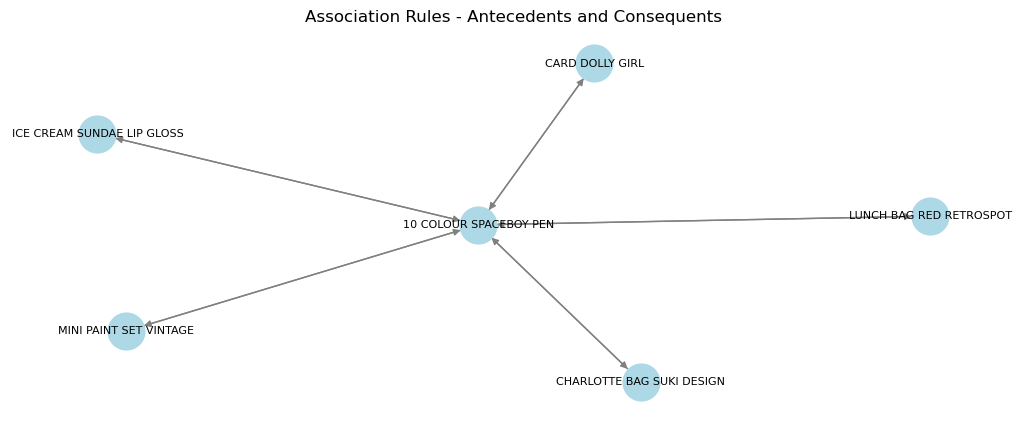

In [56]:
plt.figure(figsize=(13,5))
nx.draw_networkx(G, pos, with_labels = True, node_size=700, node_color = 'lightblue', font_size = 8, edge_color = 'gray')
plt.title ("Association Rules - Antecedents and Consequents")
plt.axis('off')
plt.show()